In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Comparing distances
## 1) String distances
### 1.1) Hamming distance
Let $S$ and $T$ be two strings of same length. 
The Hamming distance between these two strings is simply $d(T,S) = |\{i \quad \forall i \in \{1,..., |S|\} \; | \; T[i]\neq S[i])$.
This distance represent the number of positions where both strings differ, or in other words, the minimum number of substitutions (e.g., errors) that changed one string into the other.

__Questions:__
+ Write a program that computes the Hamming distance between two strings
+ Compute its complexity
+ Describe the limits of this method? Propose an example to explain your point

In [2]:
def hamming_distance(S,T):
    """
    Hamming distance
    
    Args:
        S (str): first string
        T (str): second string

    Returns:
        d (int): distance
    """

    #################
    # Write your code
    #################
    
    return 0

+ Test your code with the following example

In [3]:
result = hamming_distance("dans l'herbe noire les kobolds vont",
                          "dans l'herbr noird lzs kobolds vont")
if result == 3:
    print("Well done!")
else:
    print("Wrong answer!")

Wrong answer!


In [4]:
result = hamming_distance("dans l'herbe noire les kobolds vont ",
                          " dans l'herbe noire les kobolds vont")
if result == 36:
    print("Well done!")
else:
    print("Wrong answer!")

Wrong answer!


### 1.2) Levenshtein distance
In order to compare strings that have different lengths, or strings that undergo other kinds of modification (e.g., insertions, deletionss), the Levenshtein distance can be used.

Let $S$ and $T$ be two strings with possibly $|S| \neq |T|$, and let $\mathbb{1}_{S[i] \neq T[j]}$ be the indicator function that is equal to one when $S[i] \neq T[j]$ and 0 otherwise.

Let $\mathcal{L}_{S,T}(i,j)$ be the Levenshtein distance between $S[1,i]$ (i.e., the first $i$ characters of $S$) and $T[1,j]$ (i.e., the first $j$ characters of $T$):

+ if $min(i,j)=0$: $\quad \mathcal{L}_{S,T}(i,j)= max(i,j)$ 


+ Otherwise:

$$
    \mathcal{L}_{S,T}(i,j)= min
\begin{cases}
    \mathcal{L}_{S,T}(i-1,j) + 1\\
    \mathcal{L}_{S,T}(i,j-1) + 1\\
    \mathcal{L}_{S,T}(i-1,j-1) + \mathbb{1}_{S[i] \neq T[j]}
\end{cases}
$$

The Wagner–Fischer algorithm, can be used to compute the Levenshtein distance between $S$ and $T$. 
This dynamic programming algorithm, stores a matrix with the Levenshtein distances between all prefixes of both strings.
The last value of the matrix (at row $|S|$ and column $|T|$) stores the Levenshtein distance between both strings.

__Questions:__

+ Compute the complexity of the algorithm that aims at computing this function
+ Program this function in Python.
+ Compare two strings, and represent the matrix using `sns.heatmap`

In [11]:
def Levenshtein_distance(S,T,return_matrix=False):
    """
    Levenshtein distance

    Args:
        S (str): first string
        S (str): second string
        return_matrix (bool): If true return matrix, else return distance

    Returns:
        F (np.array, np.array): If return_matrix is true F is the score matrix 
        S_aligned, T_aligned (str,str): If return_matrix is false return only the distance
        
    """
    L = np.zeros((len(S)+1,len(T)+1))
    
    #################
    # Write your code
    #################
    if return_matrix:
        return L
    else:
        return L[-1,-1]
    return 0

+ Test your code

In [12]:
result = Levenshtein_distance("dans l'herbe noire les kobolds vont ",
                             " dans l'herbe noire les kobolds vont le vent profond")
if result == 16:
    print("Well done!")
else:
    print("Wrong answer!")

Wrong answer!


In [7]:
L = Levenshtein_distance("dans l'herbe noire les kobolds vont ",
                        " dans l'herbe noire les kobolds vont le vent profond",
                        return_matrix=True)


In [ ]:
sns.heatmap(L)

You should see this if you execute the cell above

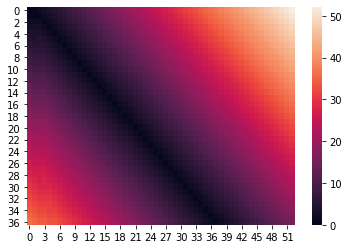

In [31]:
# Do not execute this cell

## 3) Alignment

### 3.1) Needleman-Wunsch - Global Alignment

This algorithm performs a global sequence alignment, i.e., it finds the best alignment over the entire length of two sequences $S$ and $T$. Intuitively the algorithm seeks an alignment that maximizes the number of element-to-element matches.
This dynamic programming algorithm is similar to the Wagner–Fischer algorithm.
The underlying scoring system defined by Needleman and Wunsch is equal to 1 for matches,  -1 for mismatches or indels.
Let $F_{S,T}(i,j)$ be the total number of matches scoring between the first $i$ elements of $S$ and the first $j$ elements of $T$:

+ If $i=0$ or $j=0$ $F_{S,T}(i,j) = -max(i,j)$ 

+ Otherwise:

$$
        \mathcal{F}_{S,T}(i,j)= max
\begin{cases}
    \mathcal{F}_{S,T}(i-1,j) - 1\\
    \mathcal{F}_{S,T}(i,j-1) - 1\\
    \mathcal{F}_{S,T}(i-1,j-1) - \mathbb{1}_{S[i] \neq T[j]} + \mathbb{1}_{S[i] = T[j]}
\end{cases}
$$

+ Record the values of $F_{S,T}(i,j)$ in a matrix

+ For each element in the matrix, record the decision that was made to reach this value: 
    + $\mathcal{F}_{S,T}(i-1,j)$
    + $\mathcal{F}_{S,T}(i,j-1)$
    + or $\mathcal{F}_{S,T}(i-1,j-1)$).  

+ In order to find the best alignment, 

+ To find the best alignment we start from the last element of the matrix (at row $|S|$ and column $|T|$) and we move backwards until we reach the first one (at row $0$ and column $0$). At each position we check which decision leaded to the actual solution (many solutions are sometimes possible, in this case you can keep all of them).
    + If the decision was $F_{S,T}(i-1,j)$ then it means that $S[i]$ is aligned with a gap
    + If the decision was $F_{S,T}(i,j-1)$ then $T[j]$ is aligned with a gap
    + If it was $F_{S,T}(i-1,j-1)$ then $S[i]$ and $T[j]$ are aligned. You can use the records you made in the previous step or recompute the possibilities ... both are possible.
\end{itemize}

__Questions:__
+ Program the Needleman-Wunsch algorithm, the function takes two strings as input and should return the decisions matrix, as well as the scores matrix.
+ Program a function that receives the strings as well as the decision function and returns an aligned version of both strings (deleted characters being replaced by "_")
+ Compute the complexity of this algorithm


In [13]:
import numpy as np
def NWmatrix2strings(S,T,D):
    """
    Needleman-Wunch matrix to aligned strings

    Args:
        S (str): first string
        T (str): second string
        D (np.array or list of lists): Decision matrix

    Returns:
        S_aligned (str): first string aligned
        T_aligned (str): second string aligned
        
    """
    S_aligned = ""
    T_aligned = ""
    
    #################
    # Write your code
    #################
    
    return(S_aligned,T_aligned)
    
def Needleman_Wunch(S,T,return_matrix=False):
    """
    Needleman-Wunch 

    Args:
        S (str): first string
        T (str): second string
        return_matrix (bool): If true return matrix, else return the aligned strings

    Returns:
        F,D (np.array, np.array): If return_matrix is true F is the score matrix and D the decision matrix
        S_aligned, T_aligned (str,str): If return_matrix is false first and second strings aligned
        
    """
    T_WITH_GAP = 1
    S_WITH_GAP = -1
    S_T_ALIGN = 0
    decision = [T_WITH_GAP,S_WITH_GAP,S_T_ALIGN]
    F = np.zeros((len(S)+1,len(T)+1))
    D = np.zeros((len(S)+1,len(T)+1))
    
    #################
    # Write your code
    #################
    
    if return_matrix:
        return F,D
    else:
        return NWmatrix2strings(S,T,D)
 

In [14]:
S = "dans l'herbe noire les gros kobolds vont "
T = " dans l'herbe noire les kobolds vont le vent profond"
S_,T_ = Needleman_Wunch(S,T,False)
if S_ == "_dans l'herbe noire les gros kobolds vont _______________" and T_ == " dans l'herbe noire les _____kobolds vont le vent profond":
    print("well done!")
else:
    print("wrong result")

wrong result


In [15]:
F,D = Needleman_Wunch(S,T,True)


Matrix F and matrix D should look like this

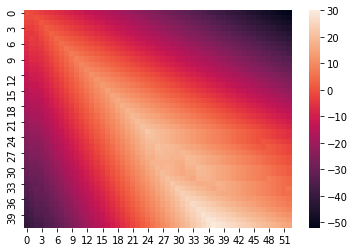

In [35]:
# Do not execute this cell

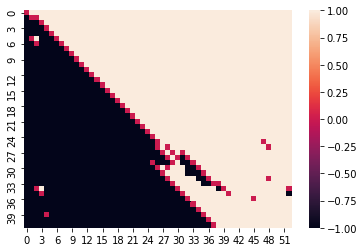

In [36]:
# Do not execute this cell

### 3.2) Smith-Waterman - local Alignment


Smith-Waterman algorithm performs local sequence alignment, i.e., it finds alignments shorter than the entire sequences.
This kind of alignments is particularly useful when we compare two sequences that are very different, but that may share some local regions with high similarity.
The Smith-Waterman algorithm is very similar to the Needleman-Wunsch method.


+ If $i=0$ or $j=0$ $F_{S,T}(i,j) = 0$ 

+ Otherwise:

$$
        \mathcal{F}_{S,T}(i,j)= max
            \begin{cases}
                \mathcal{F}_{S,T}(i-1,j) - 1\\
                \mathcal{F}_{S,T}(i,j-1) - 1\\
                \mathcal{F}_{S,T}(i-1,j-1) - \mathbb{1}_{S[i] \neq T[j]} + \mathbb{1}_{S[i] = T[j]}\\
                0
            \end{cases}
$$

Moreover, instead of starting at position $|S|$ and $|T|$ to traceback the alignment, one should start at the maximal position in the matrix. And the traceback stops as soon as we reach a 0.

__Questions:__
+ Explain the reasons behind the difference between both methods
+ Program the Smith-Waterman algorithm, the function should take two strings as input and should return the decisions matrix, as well as the scores matrix
+ Program a function that receives the strings as well as the decision and the score matrices and returns an aligned version of both strings (deleted characters being replaced by "_")
+ Compute the complexity of this algorithm


In [19]:
def SWmatrix2strings(S,T,D,F):
    """
    Smith-Waterman matrix to aligned strings

    Args:
        S (str): first string
        T (str): second string
        D (np.array or list of lists): Decision matrix
        F (np.array or list of lists): Scores matrix

    Returns:
        S_aligned (str): first string aligned
        T_aligned (str): second string aligned
        
    """    
    S_aligned = ""
    T_aligned = ""
    #################
    # Write your code
    #################
    
    return(S_aligned,T_aligned)

def Smith_Waterman(S,T,return_matrix=False):
    """
    Needleman-Wunch 

    Args:
        S (str): first string
        S (str): second string
        return_matrix (bool): If true return matrix, else return the aligned strings

    Returns:
        F,D (np.array, np.array): If return_matrix is true F is the score matrix and D the decision matrix
        S_aligned, T_aligned (str,str): If return_matrix is false first and second strings aligned
        
    """
    T_WITH_GAP = 1
    S_WITH_GAP = -1
    S_T_ALIGN = 0
    NO_ALIGN = 2
    decision = [T_WITH_GAP,S_WITH_GAP,S_T_ALIGN,NO_ALIGN]
    F = np.zeros((len(S)+1,len(T)+1))
    D = np.zeros((len(S)+1,len(T)+1))
    
    #################
    # Write your code
    #################
    
    if return_matrix:
        return F,D
    else:
        return NWmatrix2strings(S,T,D,F)

In [17]:
S = "un buisson gifle l'oeil au passant. dans l'herbe noir(e les gros kobolds vont "
T = " dans l'herbe noire les kobolds vont le vent profond pleure on veut croire"
S_,T_ = Smith_Waterman(S,T,False)
if S_ == " dans l'herbe noir(e les gros kobolds vont " and T_ == " dans l'herbe noir_e les _____kobolds vont ":
    print("well done!")
else:
    print("wrong answer")

wrong answer


In [18]:
F,D = Smith_Waterman(S,T,True)

Matrix F an matrix D should look like this

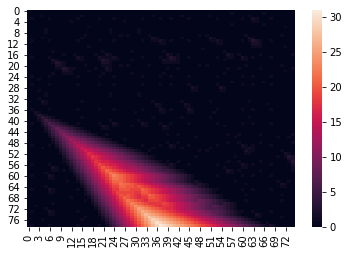

In [39]:
# Do not execute this cell

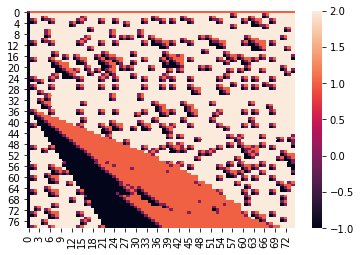

In [40]:
# Do not execute this cell

# Real World Application
## Clustering of microRNA sequences

In this section we use the Levenshtein distance to study the similarity between sequences from a database.

+ Install the Levenshtein Python library: `pip install python-Levenshtein` (in Colab)
+ Download some miRNA sequences from the miRBase database: http://www.mirbase.org/ftp.shtml 
+ Compute the pairwise distances between the different sequences.
+ Use the `clustermap` function from `seaborn` to represent the results, take a look at the documentation and explain the function.



## More material

+ Illustration for Needleman-Wunsch: https://www.wikiwand.com/en/Needleman%E2%80%93Wunsch_algorithm

+ Illustration for Smith-Waterman:  https://www.wikiwand.com/en/Smith%E2%80%93Waterman_algorithm